In [1]:
import sqlite3
import pandas as pd
import requests
import os

# Download the database file from the URL
url = "https://techassessment.blob.core.windows.net/aiap20-group-exercise-data/call_duration_modified.db"
db_file = "call_duration_modified.db"

if not os.path.exists(db_file):
    response = requests.get(url)
    with open(db_file, 'wb') as f:
        f.write(response.content)

# Connect to the SQLite database
conn = sqlite3.connect(db_file)

# List tables
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Available Tables:")
print(tables)

# Load the main table (you might need to change 'call_data' to the actual table name)
# Example assumes only one table
table_name = tables.iloc[0, 0]
df = pd.read_sql(f"SELECT * FROM {table_name}", conn)

# Show first few rows
df.head()


Available Tables:
                     name
0  call_duration_modified


,SN,Age,Occupation,Previous Contact Days,Previous Number of Contacts,Previous Outcome,Campaign Calls,Campaign Call Duration,Subscription Status
0,1,56,housemaid,999,0,nonexistent,1,261,no
1,2,57,services,999,0,nonexistent,1,149,no
2,3,37,services,999,0,nonexistent,1,226,no
3,4,40,admin.,999,0,nonexistent,1,151,no
4,5,56,services,999,0,nonexistent,1,307,no


In [2]:
# Describe the dataset
df.describe()


,SN,Age,Previous Contact Days,Previous Number of Contacts,Campaign Calls,Campaign Call Duration
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,20594.50000,40.02406,962.475454,0.172963,2.567593,258.285010
std,11890.09578,10.42125,186.910907,0.494901,2.770014,259.279249
min,1.00000,17.00000,0.000000,0.000000,1.000000,0.000000
25%,10297.75000,32.00000,999.000000,0.000000,1.000000,102.000000
50%,20594.50000,38.00000,999.000000,0.000000,2.000000,180.000000
75%,30891.25000,47.00000,999.000000,0.000000,3.000000,319.000000
max,41188.00000,98.00000,999.000000,7.000000,56.000000,4918.000000


In [3]:
# Transposed version of descriptive statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
SN,41188.0,20594.500000,11890.095780,1.0,10297.75,20594.5,30891.25,41188.0
Age,41188.0,40.024060,10.421250,17.0,32.00,38.0,47.00,98.0
Previous Contact Days,41188.0,962.475454,186.910907,0.0,999.00,999.0,999.00,999.0
Previous Number of Contacts,41188.0,0.172963,0.494901,0.0,0.00,0.0,0.00,7.0
Campaign Calls,41188.0,2.567593,2.770014,1.0,1.00,2.0,3.00,56.0
Campaign Call Duration,41188.0,258.285010,259.279249,0.0,102.00,180.0,319.00,4918.0


In [4]:
# Logical variables: dtype == bool
logical_vars = df.select_dtypes(include='bool').columns.tolist()

# Discrete variables: typically integer or object with a small number of unique values
discrete_vars = []
for col in df.columns:
    if df[col].dtype in ['int64', 'object']:
        unique_vals = df[col].nunique()
        if unique_vals < 20:  # You can adjust this threshold
            discrete_vars.append(col)

print("Logical Variables:", logical_vars)
print("Discrete Variables:", discrete_vars)


Logical Variables: []
Discrete Variables: ['Occupation', 'Previous Number of Contacts', 'Previous Outcome', 'Subscription Status']


In [5]:
# Inspect value counts for each discrete variable
for col in discrete_vars:
    print(f"\n=== {col} ===")
    print(df[col].value_counts())



=== Occupation ===
Occupation
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

=== Previous Number of Contacts ===
Previous Number of Contacts
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

=== Previous Outcome ===
Previous Outcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

=== Subscription Status ===
Subscription Status
no     36548
yes     4640
Name: count, dtype: int64


In [6]:
# List all columns/features in the DataFrame
df.columns.tolist()


['SN',
 'Age',
 'Occupation',
 'Previous Contact Days',
 'Previous Number of Contacts',
 'Previous Outcome',
 'Campaign Calls',
 'Campaign Call Duration',
 'Subscription Status']

/Users/sjze/miniconda3/lib/python3.12/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  from scipy.stats import gaussian_kde
/var/folders/yy/z5z9fqnx3s77bj243q100tkr0000gn/T/ipykernel_35056/1176023167.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df, palette='Set2')
/var/folders/yy/z5z9fqnx3s77bj243q100tkr0000gn/T/ipykernel_35056/1176023167.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df, palette='Set2')
/var/folders/yy/z5z9fqnx3s77bj243q100tkr0000gn/T/ipykernel_35056/1176023167.py:27: FutureWarning: 

Passing `palette` without assignin

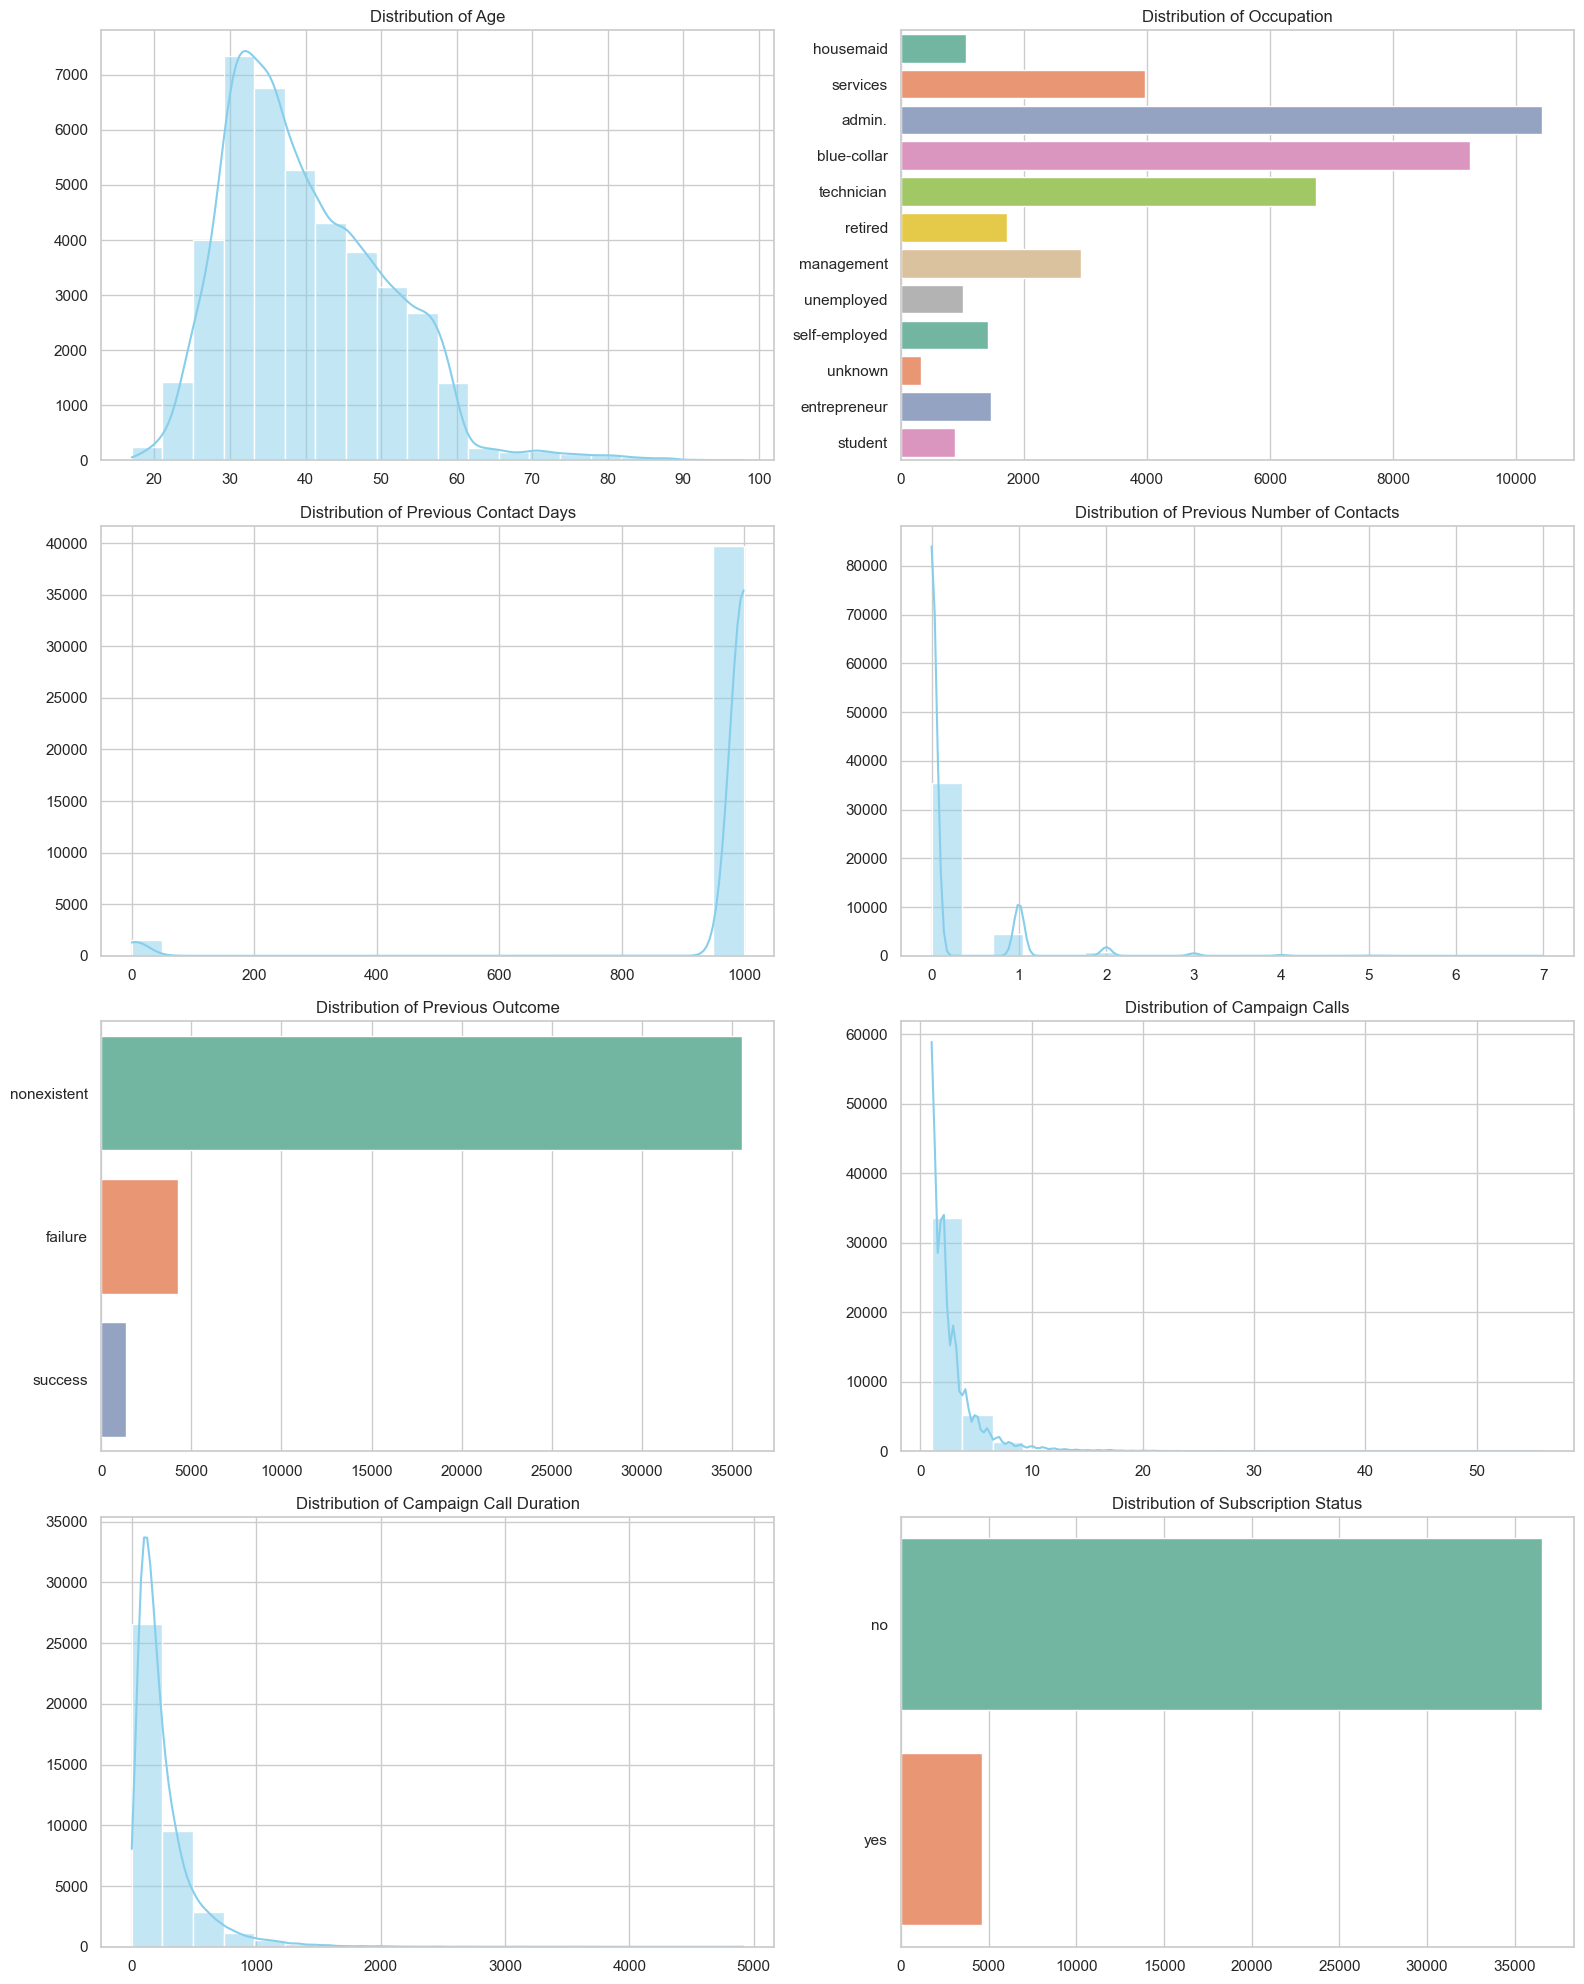

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')
plt.figure(figsize=(16, 20))

# List of selected features
features = [
    'Age',
    'Occupation',
    'Previous Contact Days',
    'Previous Number of Contacts',
    'Previous Outcome',
    'Campaign Calls',
    'Campaign Call Duration',
    'Subscription Status'
]

# Create 2-column subplot grid
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    
    if df[feature].dtype in ['int64', 'float64']:
        sns.histplot(df[feature], bins=20, kde=True, color='skyblue')
    else:
        sns.countplot(y=feature, data=df, palette='Set2')
        
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [8]:
# List of numeric features to check
numeric_features = [
    'Age',
    'Previous Contact Days',
    'Previous Number of Contacts',
    'Campaign Calls',
    'Campaign Call Duration'
]

# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

# Check for each feature
for col in numeric_features:
    outliers, low, high = detect_outliers_iqr(df, col)
    print(f"\n--- {col} ---")
    print(f"Outlier Thresholds: < {low:.2f} or > {high:.2f}")
    print(f"Number of Outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers[[col]].head())  # Show a few outliers



--- Age ---
Outlier Thresholds: < 9.50 or > 69.50
Number of Outliers: 469
       Age
27713   70
27757   76
27780   73
27800   88
27802   88

--- Previous Contact Days ---
Outlier Thresholds: < 999.00 or > 999.00
Number of Outliers: 1515
       Previous Contact Days
24108                      6
24264                      4
24279                      4
24397                      3
24482                      4

--- Previous Number of Contacts ---
Outlier Thresholds: < 0.00 or > 0.00
Number of Outliers: 5625
       Previous Number of Contacts
24013                            1
24019                            1
24076                            1
24102                            1
24108                            1

--- Campaign Calls ---
Outlier Thresholds: < -2.00 or > 6.00
Number of Outliers: 2406
      Campaign Calls
887                7
1043               8
1094               8
1097               7
1230               7

--- Campaign Call Duration ---
Outlier Thresholds: < -223.50 or >